In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Downloads/Signal.csv')

In [5]:
df

Time  NoisySignal
0    0.000      -1.3500
1    0.001      -2.1400
2    0.002       3.1400
3    0.003       6.8000
4    0.004       2.1700
..     ...          ...
995  0.995      -3.1200
996  0.996      -0.0504
997  0.997      -8.1400
998  0.998      -1.1600
999  0.999       1.3300

[1000 rows x 2 columns]

In [7]:
f = np.array(df['NoisySignal'])
f

array([-1.35e+00, -2.14e+00,  3.14e+00,  6.80e+00,  2.17e+00,  7.92e-01,
       -5.78e+00, -4.48e+00, -5.12e-01,  1.58e+00,  4.47e+00, -1.22e+00,
        6.78e-02, -4.15e+00, -2.60e+00, -4.72e+00, -1.34e-01,  4.12e-01,
        3.63e+00, -3.80e-01, -5.85e-02, -1.33e+00, -4.32e+00, -3.73e+00,
        4.45e+00,  2.15e+00,  2.19e+00,  7.79e-01,  2.26e-01,  2.15e+00,
       -1.87e+00,  4.79e-01, -6.20e-01, -1.04e+00,  2.49e+00,  2.69e+00,
       -1.39e+00, -1.09e+00,  1.72e+00,  4.20e+00, -2.95e+00,  3.97e+00,
        2.21e+00,  4.24e-02, -1.73e+00,  1.64e+00, -1.65e+00, -4.86e-01,
        2.92e-01, -1.16e-02,  1.70e+00,  3.14e+00,  5.95e-01,  5.12e+00,
       -3.01e+00, -4.37e+00,  2.25e+00, -5.78e+00,  2.37e+00, -1.41e+00,
       -1.19e+00,  1.86e+00,  3.36e+00,  2.23e+00,  3.14e+00, -4.23e+00,
       -6.06e+00, -3.36e+00, -1.20e+00,  4.34e+00,  3.28e+00,  1.60e+00,
       -1.11e-01, -6.06e-01,  5.77e+00, -3.99e+00,  1.43e+00,  3.12e-02,
       -2.57e+00, -7.62e+00, -1.46e+00, -6.30e+00, 

In [9]:
dt = 0.001
t = np.arange(0, 1, dt)

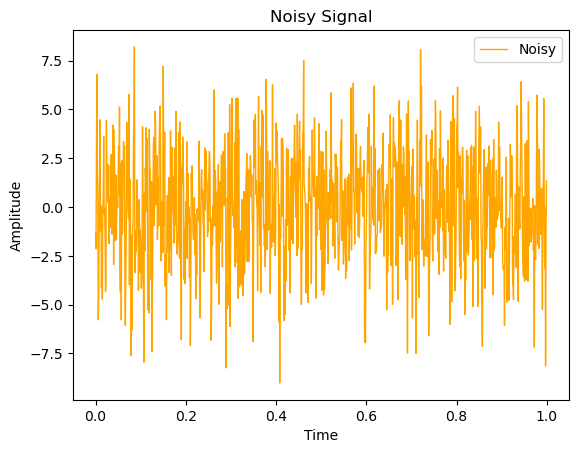

In [11]:
plt.plot(t, f, color = 'orange', label = 'Noisy', lw = 1)
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [13]:
n = len(t)
fhat = np.fft.fft(f, n)
PSD = fhat * np.conj(fhat) / n #Power Spectral Density
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype = 'int')

C:\Users\anany\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\anany\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


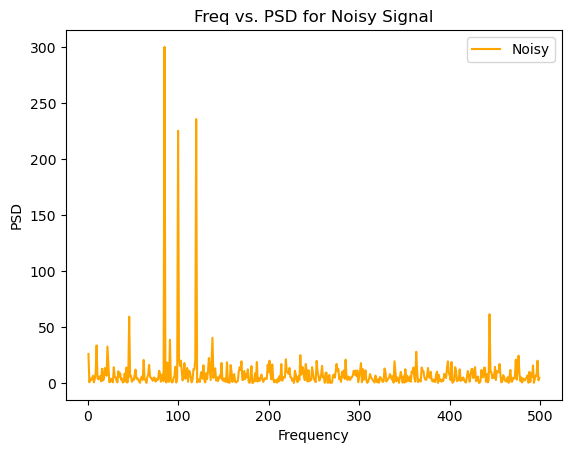

In [15]:
plt.plot(freq[L], PSD[L], color = 'orange', label = 'Noisy')
plt.title('Freq vs. PSD for Noisy Signal')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.legend()
plt.show()

In [17]:
indices = PSD > 100
PSD_clean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

C:\Users\anany\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\anany\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


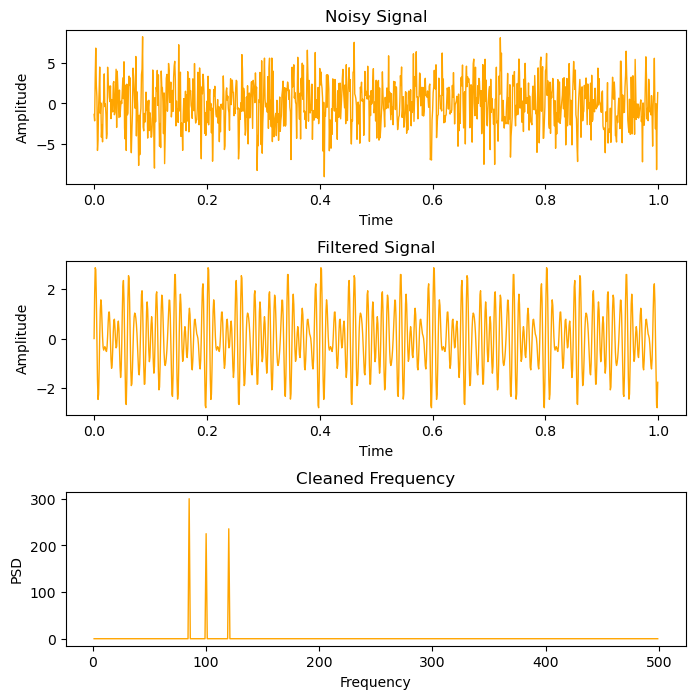

In [19]:
fig, axs = plt.subplots(3, 1, figsize = (8, 8))

plt.sca(axs[0])
plt.plot(t, f, color = 'orange', label = 'Noisy', lw = 1)
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.sca(axs[1])
plt.plot(t, ffilt, color = 'orange', label = 'Filtered', lw = 1)
plt.title('Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.sca(axs[2])
plt.plot(freq[L], PSD_clean[L], color = 'orange', lw = 1)
plt.title('Cleaned Frequency')
plt.xlabel('Frequency')
plt.ylabel('PSD')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [21]:
df_cleaned = pd.DataFrame({'Frequency': freq[L], 'PSD': PSD[L]})
df_cleaned['PSD'] = df_cleaned['PSD'].astype('float64')
df_cleaned.loc[df_cleaned['PSD'] > 100]

C:\Users\anany\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


Frequency         PSD
84        85.0  300.080755
99       100.0  225.147696
119      120.0  235.601648

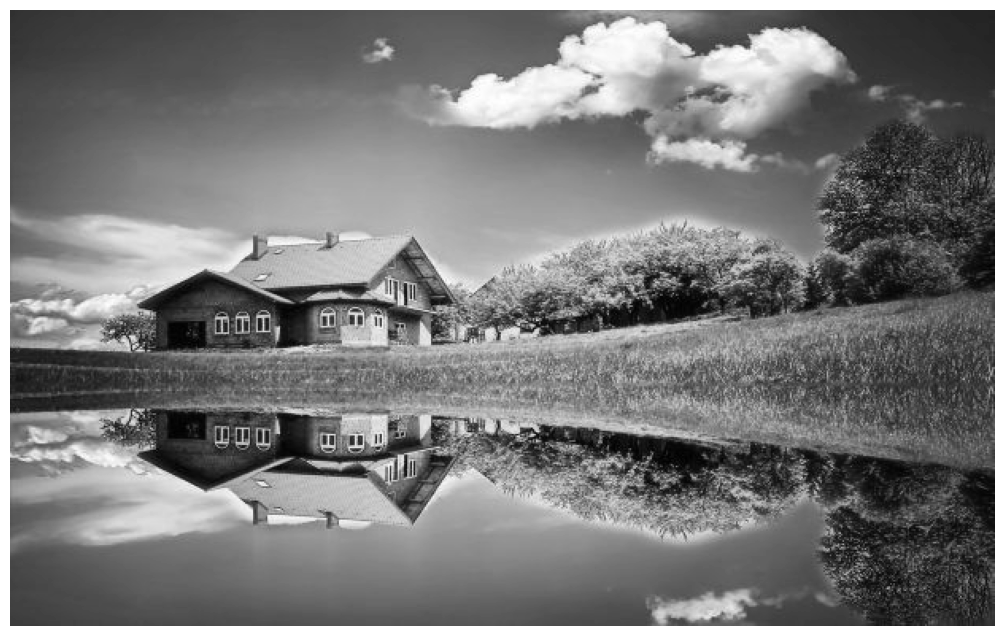

Bildgröße: (388, 620)


In [25]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.linalg as ln
import numpy as np
import os
from PIL import Image
from math import log10, sqrt 
plt.rcParams['figure.figsize'] = [16, 8]
# Import image
A = imread(os.path.join("Downloads/MiniTask_Image.jpg"))
X = A.dot([0.299, 0.5870, 0.114]) # Convert RGB to grayscale
img = plt.imshow(X)
# Convert to gray
img.set_cmap('gray')
plt.axis('off')
plt.show()
# Call image size
print('Bildgröße: %s'%str(X.shape))

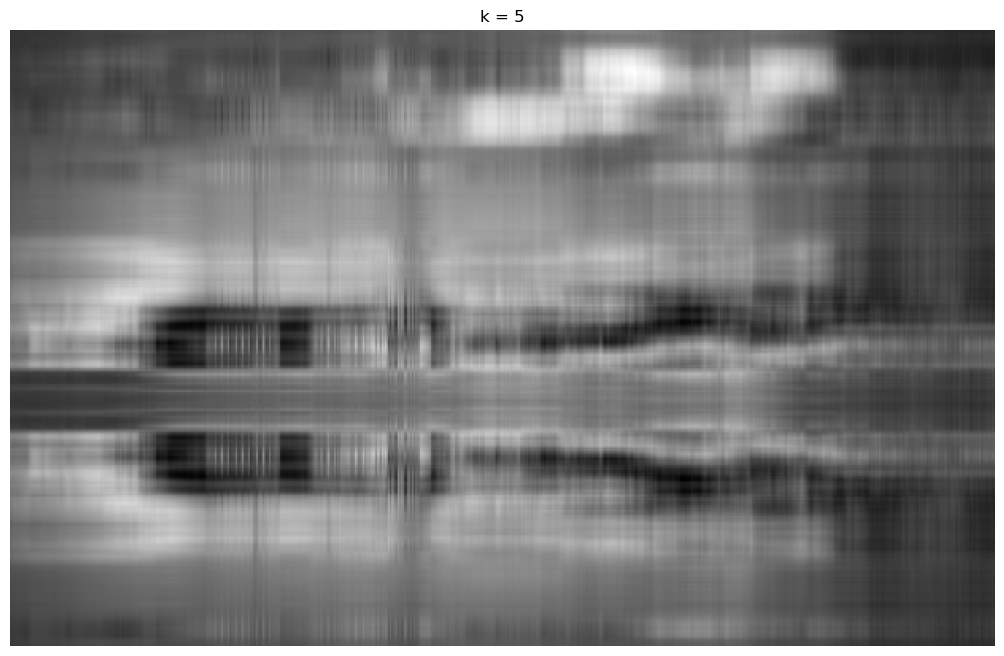

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.010421875
Compression rate is 1.04%
Die Mittlere quadratische Abweichung beträgt 696
Signal-Rausch-Verhältnis beträgt 20dB


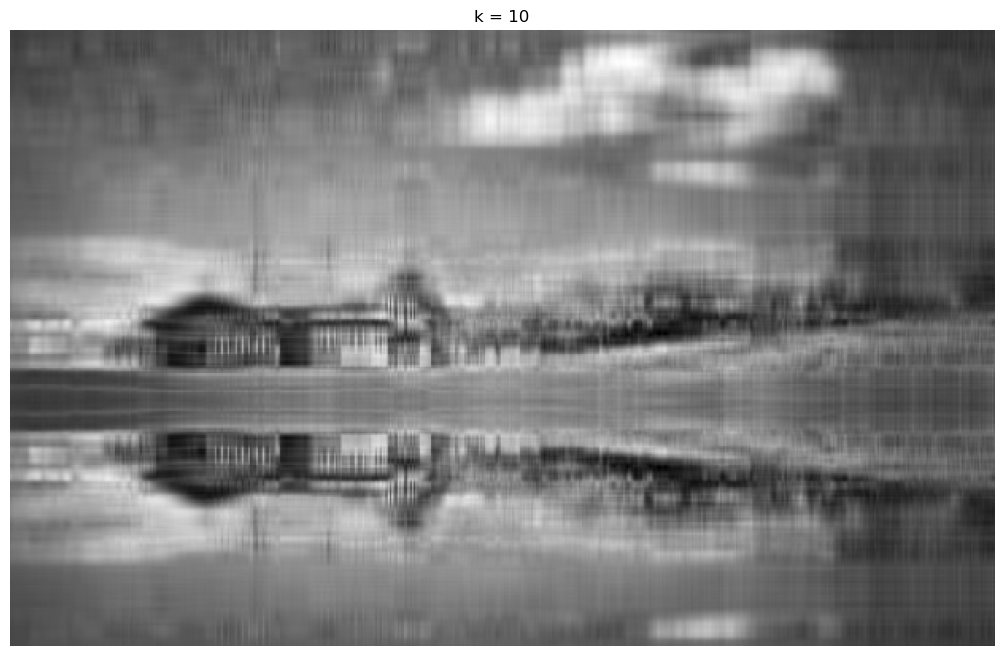

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.02084375
Compression rate is 2.08%
Die Mittlere quadratische Abweichung beträgt 425
Signal-Rausch-Verhältnis beträgt 22dB


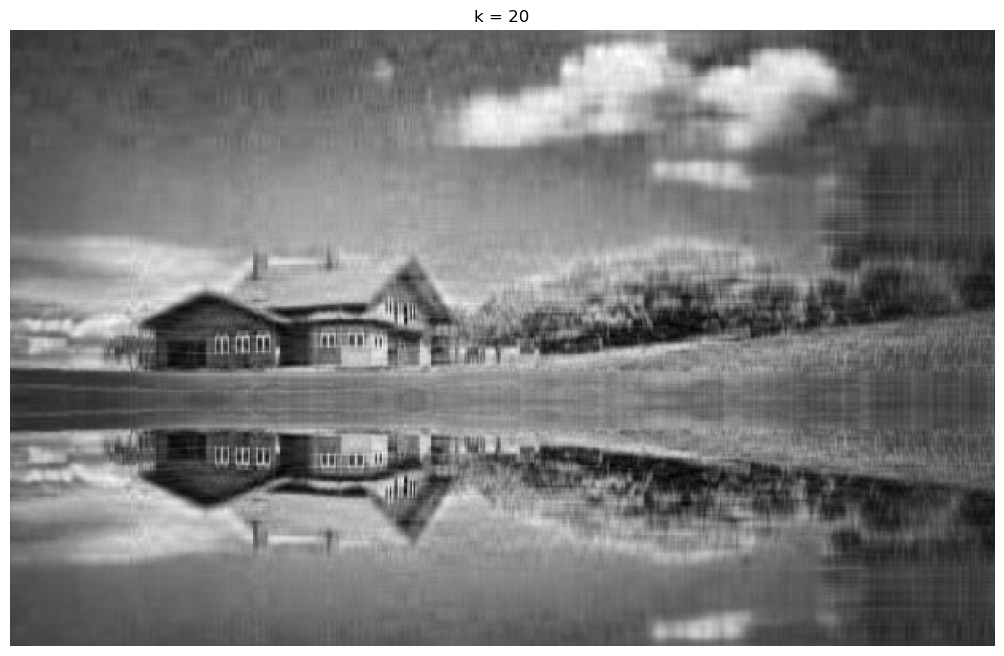

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.0416875
Compression rate is 4.17%
Die Mittlere quadratische Abweichung beträgt 252
Signal-Rausch-Verhältnis beträgt 24dB


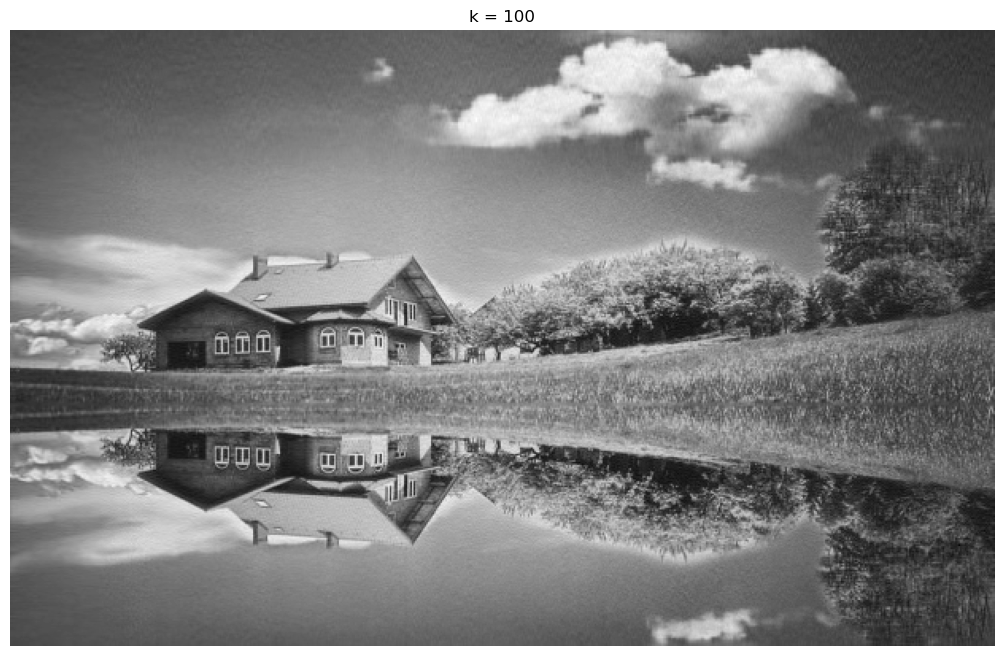

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.2084375
Compression rate is 20.84%
Die Mittlere quadratische Abweichung beträgt 44
Signal-Rausch-Verhältnis beträgt 32dB


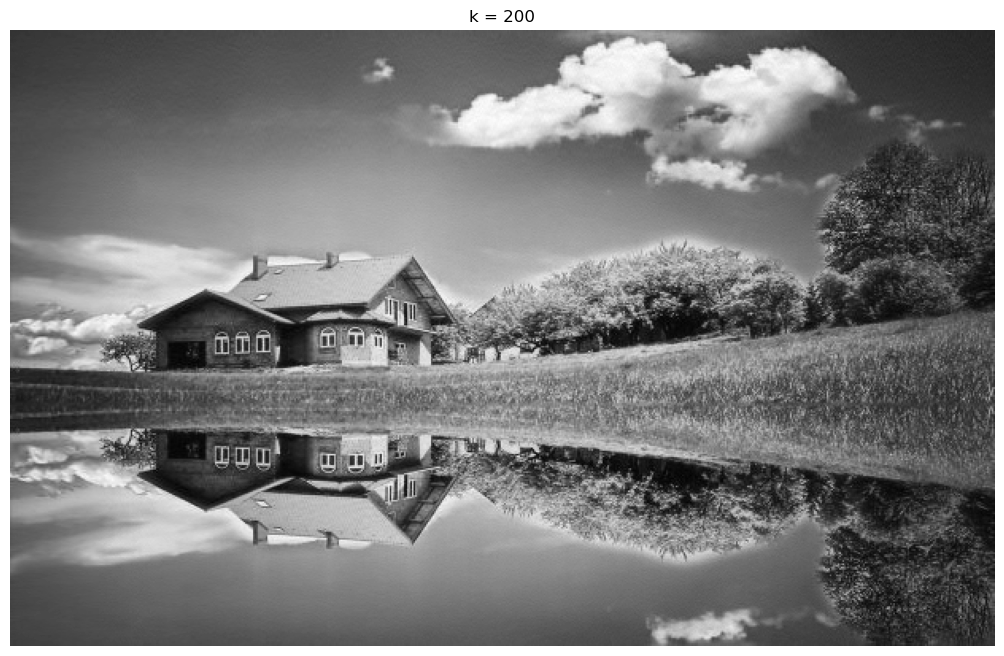

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.416875
Compression rate is 41.69%
Die Mittlere quadratische Abweichung beträgt 7
Signal-Rausch-Verhältnis beträgt 40dB


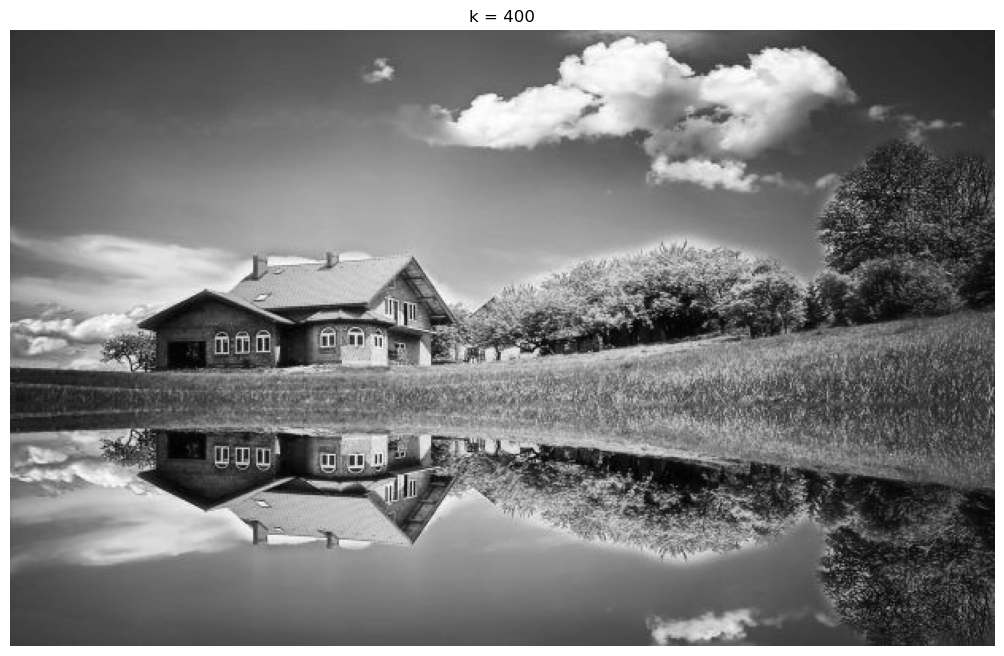

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.83375
Compression rate is 83.38%
Die Mittlere quadratische Abweichung beträgt 0
Signal-Rausch-Verhältnis beträgt 289dB


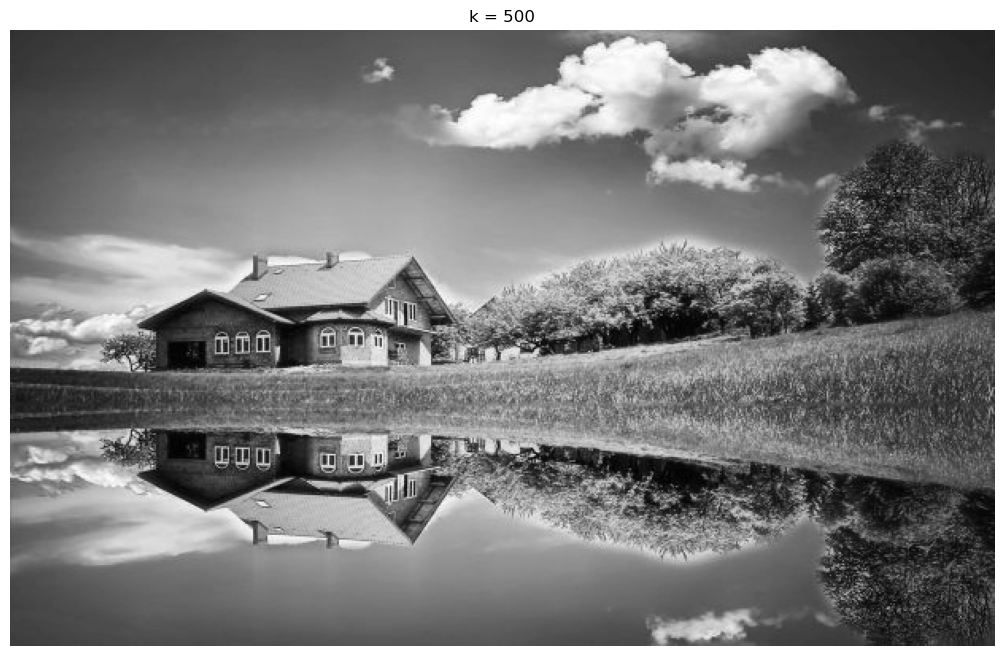

Originalgröße:
960000
komprimierte Größe / Originalgröße:
1.0421875
Compression rate is 104.22%
Die Mittlere quadratische Abweichung beträgt 0
Signal-Rausch-Verhältnis beträgt 289dB


In [27]:
# split the matrix into U, S, VT
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
m = 800 # Image's width
n = 1200 # Image's height
j = 0
# Try compression with different k:
for k in (5,10, 20, 100,200,400,500):
    # Original size of the image
    originalSize = m * n 
    # Size after compressed
    compressedSize = k * (1 + m + n) 
    # Aüürpximation of A
    Xapprox = U[:,:k] @ S[0:k,:k] @ VT[:k,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    
    plt.axis('off')
    plt.title('k = ' + str(k))
    plt.show() 
    print('Originalgröße:')
    print(originalSize)
    print('komprimierte Größe / Originalgröße:')
    # Estimate the compression rate
    ratio = compressedSize * 1.0 / originalSize
    print(ratio)
    print('Compression rate is ' + str( round(ratio * 100 ,2)) + '%' )  
    # Estimate MQA
    x= X.astype("float")
    y=Xapprox.astype("float")
    err = np.sum((x - y) ** 2)
    err /= float(X.shape[0] * Xapprox.shape[1])
    print('Die Mittlere quadratische Abweichung beträgt '+ str(round( err)))
    max_pixel = 255.0
    # Estimate Signal Noise Ratio
    srv = 20 * (log10(max_pixel / sqrt(err)))
    print('Signal-Rausch-Verhältnis beträgt '+ str(round(srv)) +'dB')
